#### Plot components including Bering Strait outflow

In [2]:
import jCMIP as jc
Clist = jc.readList(('CMIP6listnew'))

from netCDF4 import Dataset
from netCDF4 import num2date
import numpy as np
from scipy.integrate import quad
from scipy import stats as st
import matplotlib.pyplot as plt
import cftime
import gsw
from datetime import date, timedelta
import pandas as pd
from scipy.interpolate import interp1d

#### Historical and RAPID

##### Timeseries

2004-03-09 00:00:00


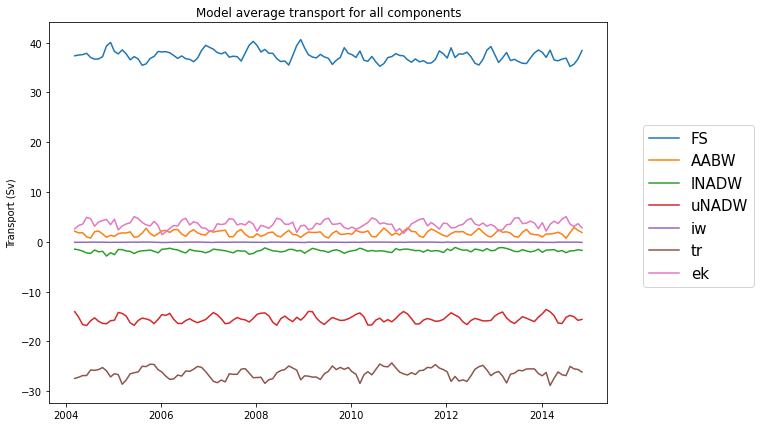

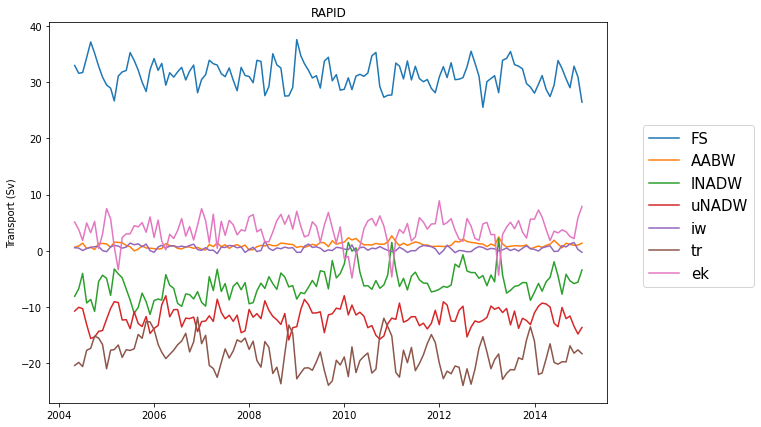

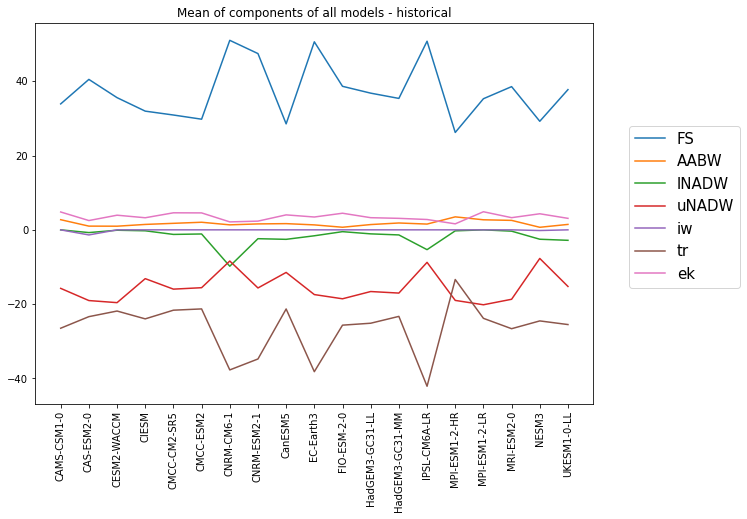

In [3]:
totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CNRM-ESM2-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r2i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']
EXP    = 'historical'

t10 = 129
fs10tot    = np.zeros((t10,len(totmod)))
AABW10tot  = np.zeros((t10,len(totmod)))
lNADW10tot = np.zeros((t10,len(totmod)))
uNADW10tot = np.zeros((t10,len(totmod)))
iw10tot    = np.zeros((t10,len(totmod)))
tr10tot    = np.zeros((t10,len(totmod)))
ek10tot    = np.zeros((t10,len(totmod)))
for i in range (len(totmod)):
    outfile = ('/home/users/jordi/components_tp/' + totmod[i] + '_' + EXP + '_' + ENS[i] + '.nc')
    ncid    = Dataset(outfile,'r')
    fs10    = ncid.variables['fs10'][:]        
    AABW10  = ncid.variables['AABW10'][:]      
    lNADW10 = ncid.variables['lNADW10'][:]     
    uNADW10 = ncid.variables['uNADW10'][:]     
    iw10    = ncid.variables['iw10'][:]      
    tr10    = ncid.variables['tr10'][:]    
    ek10    = ncid.variables['ek10'][:]      
    ncid.close()
    
    fs10tot[:,i]    = fs10
    AABW10tot[:,i]  = AABW10
    lNADW10tot[:,i] = lNADW10
    uNADW10tot[:,i] = uNADW10
    iw10tot[:,i]    = iw10
    tr10tot[:,i]    = tr10
    ek10tot[:,i]    = ek10

#Calculate mean transport of all models
fsmean = np.nanmean(fs10tot,axis=1)
AABWmean = np.nanmean(AABW10tot,axis=1)
lNADWmean = np.nanmean(lNADW10tot,axis=1)
uNADWmean = np.nanmean(uNADW10tot,axis=1)
iwmean = np.nanmean(iw10tot,axis=1)
trmean = np.nanmean(tr10tot,axis=1)
ekmean = np.nanmean(ek10tot,axis=1)

#Calculate time mean of all models
fstmean = np.nanmean(fs10tot,axis=0)
AABWtmean = np.nanmean(AABW10tot,axis=0)
lNADWtmean = np.nanmean(lNADW10tot,axis=0)
uNADWtmean = np.nanmean(uNADW10tot,axis=0)
iwtmean = np.nanmean(iw10tot,axis=0)
trtmean = np.nanmean(tr10tot,axis=0)
ektmean = np.nanmean(ek10tot,axis=0)

#Change time to date
outfile = ('/home/users/jordi/section26data/' + totmod[0] + '_' + EXP + '_' + ENS[0] + '.nc')
ncid    = Dataset(outfile,'r')
time    = ncid.variables['time'][:]
units   = ncid.variables['time'].units
cal     = ncid.variables['time'].calendar
ncid.close()

tdate1   = cftime.num2pydate(time,units)
tdate = tdate1[-129::]                     #tdate1[-129] = 2004-04-16 00:00:00
print(tdate[0])

plt.figure(1,figsize=(10,7))
plt.title('Model average transport for all components')
plt.plot(tdate,fsmean,label='FS')
plt.plot(tdate,AABWmean,label='AABW')
plt.plot(tdate,lNADWmean,label='lNADW')
plt.plot(tdate,uNADWmean,label='uNADW')
plt.plot(tdate,iwmean,label='iw')
plt.plot(tdate,trmean,label='tr')
plt.plot(tdate,ekmean,label='ek')
plt.ylabel('Transport (Sv)')
plt.legend(bbox_to_anchor=(1.05, 0.75),prop={'size': 15})

#Plot RAPID data
outfile = ('/home/users/jordi/RAPID_data/moc_transports.nc')
ncid = Dataset(outfile,'r')
time = len(ncid.variables['t_umo10'][:])
umo  = ncid.variables['t_umo10'][28:7822]
gs  = ncid.variables['t_gs10'][28:7822]
ekm  = ncid.variables['t_ek10'][28:7822]
moc   = ncid.variables['moc_mar_hc10'][28:7822]
tr   = ncid.variables['t_therm10'][28:7822]
iw   = ncid.variables['t_aiw10'][28:7822]
uNADW   = ncid.variables['t_ud10'][28:7822]
lNADW   = ncid.variables['t_ld10'][28:7822]
AABW   = ncid.variables['t_bw10'][28:7822]
ncid.close()

#Change time to date
trapid = np.arange(0,time/2,0.5)                #12-hourly data
drapid1   = cftime.num2pydate(trapid,units='days since 2004-04-02 00:00:00')
drapid = drapid1[28:7822]                            #drapid1[28] = 2004-04-16 00:00:00 and drapid1[7822] = 2014-12-16 12:00:00

#Monthly average RAPID data
rapid_data = np.transpose([drapid,gs,ekm,tr,iw,uNADW,lNADW,AABW])
rapid_df = pd.DataFrame(data=rapid_data,columns=['date','gs','ekm','tr','iw','uNADW','lNADW','AABW'])
rapid_df_index = rapid_df.set_index('date')
rapid_monthly = rapid_df_index.resample('M').mean()

plt.figure(2,figsize=(10,7))
plt.title('RAPID')
plt.plot(rapid_monthly.index.values,rapid_monthly['gs'],label='FS')
plt.plot(rapid_monthly.index.values,rapid_monthly['AABW'],label='AABW')
plt.plot(rapid_monthly.index.values,rapid_monthly['lNADW'],label='lNADW')
plt.plot(rapid_monthly.index.values,rapid_monthly['uNADW'],label='uNADW')
plt.plot(rapid_monthly.index.values,rapid_monthly['iw'],label='iw')
plt.plot(rapid_monthly.index.values,rapid_monthly['tr'],label='tr')
plt.plot(rapid_monthly.index.values,rapid_monthly['ekm'],label='ek')
plt.ylabel('Transport (Sv)')
plt.legend(bbox_to_anchor=(1.05, 0.75),prop={'size': 15})

plt.figure(3,figsize=(10,7))
plt.title('Mean of components of all models - historical')
plt.xticks(rotation=90)
plt.plot(totmod,fstmean,label='FS')
plt.plot(totmod,AABWtmean,label='AABW')
plt.plot(totmod,lNADWtmean,label='lNADW')
plt.plot(totmod,uNADWtmean,label='uNADW')
plt.plot(totmod,iwtmean,label='iw')
plt.plot(totmod,trtmean,label='tr')
plt.plot(totmod,ektmean,label='ek')
plt.legend(bbox_to_anchor=(1.05, 0.75),prop={'size': 15})

##### Timeseries including standard deviation

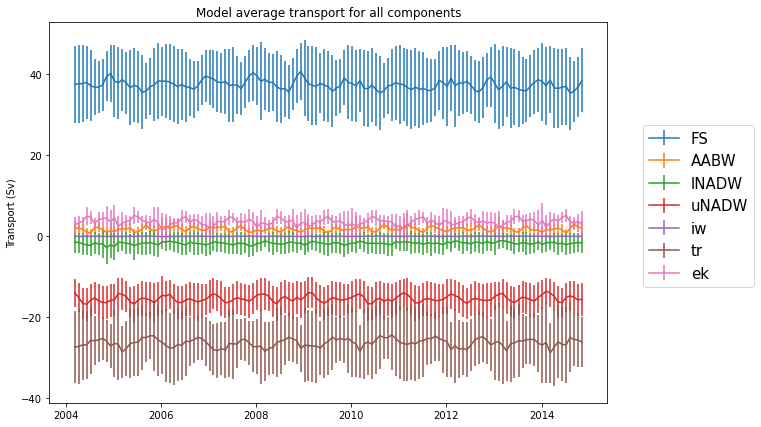

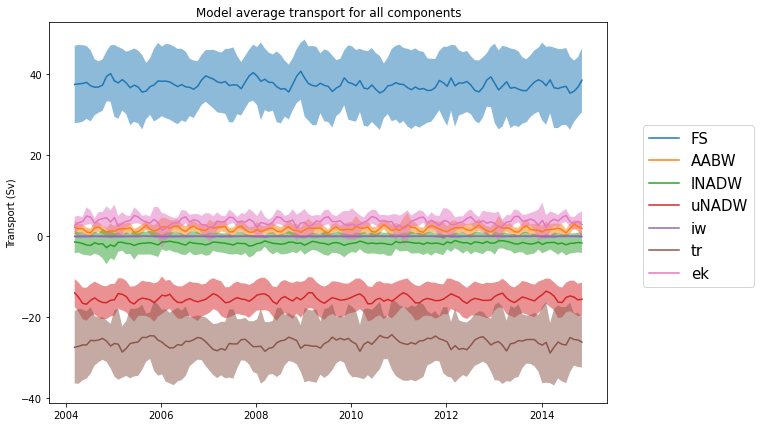

In [4]:
data = [fs10tot,ek10tot,tr10tot,iw10tot,uNADW10tot,lNADW10tot,AABW10tot]
std  = np.zeros((len(data),len(tdate)))
for i in range(len(data)):
    std[i] = np.std(data[i],axis=1)

np.shape(std)
std_df = pd.DataFrame(data=np.transpose(std),columns=['fs','ek','tr','iw','uNADW','lNADW','AABW'])

plt.figure(1,figsize=(10,7))
plt.title('Model average transport for all components')
plt.errorbar(tdate,fsmean,std_df['fs'],label='FS')
plt.errorbar(tdate,AABWmean,std_df['AABW'],label='AABW')
plt.errorbar(tdate,lNADWmean,std_df['lNADW'],label='lNADW')
plt.errorbar(tdate,uNADWmean,std_df['uNADW'],label='uNADW')
plt.errorbar(tdate,iwmean,std_df['iw'],label='iw')
plt.errorbar(tdate,trmean,std_df['tr'],label='tr')
plt.errorbar(tdate,ekmean,std_df['ek'],label='ek')
plt.ylabel('Transport (Sv)')
plt.legend(bbox_to_anchor=(1.05, 0.75),prop={'size': 15})

#Standard deviation
plt.figure(2,figsize=(10,7))
plt.title('Model average transport for all components')
plt.plot(tdate,fsmean,label='FS')
plt.fill_between(tdate,fsmean-std_df['fs'],fsmean+std_df['fs'],alpha=0.5)
plt.plot(tdate,AABWmean,label='AABW')
plt.fill_between(tdate,AABWmean-std_df['AABW'],AABWmean+std_df['AABW'],alpha=0.5)
plt.plot(tdate,lNADWmean,label='lNADW')
plt.fill_between(tdate,lNADWmean-std_df['lNADW'],lNADWmean+std_df['lNADW'],alpha=0.5)
plt.plot(tdate,uNADWmean,label='uNADW')
plt.fill_between(tdate,uNADWmean-std_df['uNADW'],uNADWmean+std_df['uNADW'],alpha=0.5)
plt.plot(tdate,iwmean,label='iw')
plt.fill_between(tdate,iwmean-std_df['iw'],iwmean+std_df['iw'],alpha=0.5)
plt.plot(tdate,trmean,label='tr')
plt.fill_between(tdate,trmean-std_df['tr'],trmean+std_df['tr'],alpha=0.5)
plt.plot(tdate,ekmean,label='ek')
plt.fill_between(tdate,ekmean-std_df['ek'],ekmean+std_df['ek'],alpha=0.5)
plt.ylabel('Transport (Sv)')
plt.legend(bbox_to_anchor=(1.05, 0.75),prop={'size': 15})

##### Check net transport

RAPID
upper tp = 16.777689175186893
lower tp = -17.787496339196384


/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice


[-0.79185717 -0.50448391 -1.0426641  -0.68364761 -1.56527135 -1.57755301
 -1.38516968 -1.39084846 -1.09157988 -1.79397027 -0.89070385 -1.32863131
 -1.36171184 -1.07028139 -1.31120306 -1.11533298 -1.27566331 -0.67707356
 -1.24894035]


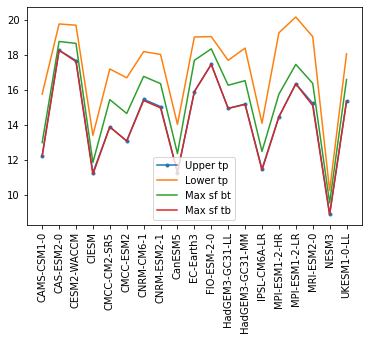

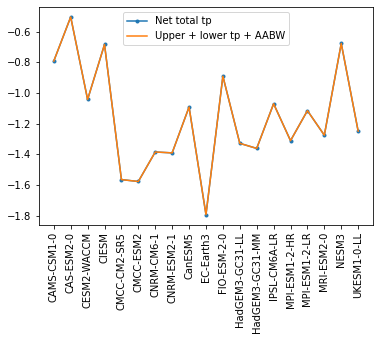

In [5]:
#RAPID
gsmean    = np.nanmean(gs)
AABWmean  = np.nanmean(AABW)
lNADWmean = np.nanmean(lNADW)
uNADWmean = np.nanmean(uNADW)
iwmean    = np.nanmean(iw)
trmean    = np.nanmean(tr)
ekmmean   = np.nanmean(ekm)

up   = ekmmean + trmean + iwmean + gsmean
down = uNADWmean + lNADWmean

print('RAPID')
print('upper tp = ' + str(up))
print('lower tp = ' + str(down))

#Model average
up      = np.zeros(len(totmod))
down    = np.zeros(len(totmod))
maxsfbt = np.zeros(len(totmod))
maxsftb = np.zeros(len(totmod))
tpsum   = np.zeros(len(totmod))
for i in range (len(totmod)):
    outfile = ('/home/users/jordi/section26data/' + totmod[i] + '_' + EXP + '_' + ENS[i] + '.nc')
    ncid    = Dataset(outfile,'r')
    tp10    = ncid.variables['tp10'][:,:,:]
    lev     = ncid.variables['lev'][:]
    ncid.close()
    
    tpmean   = np.nanmean(tp10,axis=0)
    tprow    = np.nansum(tpmean,axis=-1)
    mocbt    = -1*np.cumsum(tprow[::-1])[::-1]
    moctb    = np.cumsum(tprow)
    ilev     = np.nanargmin(np.abs(lev-200))
    maxsfbt1 = max(mocbt[ilev::])                #Make sure max is not at the surface
    maxsftb1 = max(moctb[ilev::])
    
    maxsfbt[i] = maxsfbt1
    maxsftb[i] = maxsftb1
    up[i]      = ektmean[i] + trtmean[i] + iwtmean[i] + fstmean[i]
    down[i]    = uNADWtmean[i] + lNADWtmean[i] 

    tpsum[i] = np.nansum(np.nansum(tpmean,axis=0),axis=0)
    
plt.figure(1)
plt.xticks(rotation=90)
plt.plot(totmod,up,marker='.',label='Upper tp')
plt.plot(totmod,np.abs(down),label='Lower tp')
plt.plot(totmod,maxsfbt,label='Max sf bt')
plt.plot(totmod,maxsftb,label='Max sf tb')
plt.legend()

plt.figure(2)
plt.xticks(rotation=90)
plt.plot(totmod,tpsum,marker='.',label='Net total tp')
plt.plot(totmod,(up+down+AABWtmean),label='Upper + lower tp + AABW')
#plt.plot(totmod,(up+down),label='Upper + lower tp')
plt.legend()

#### SSP585

##### Timeseries

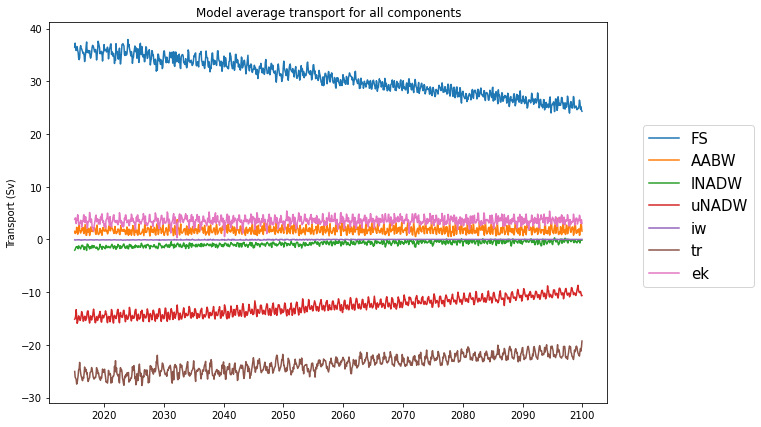

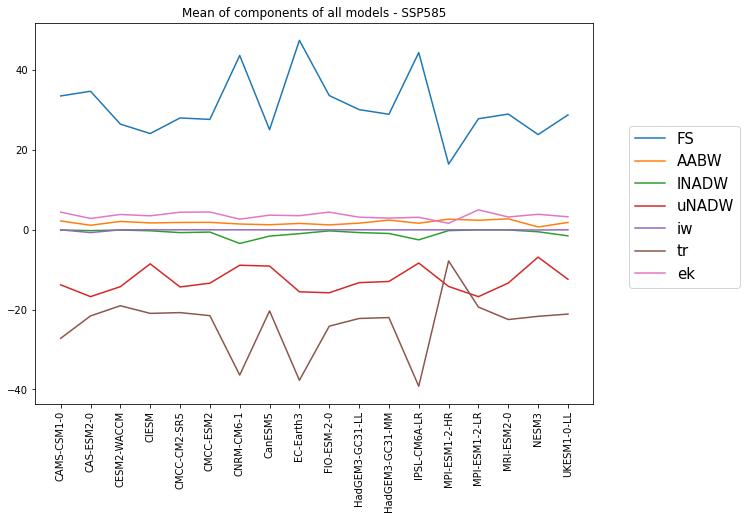

In [34]:
#CNRM-ESM2-1 (r2i1p1f2) has no ssp585
totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']
EXP    = 'ssp585'

t = 85*12       #2015 - 2100
fs85tot    = np.zeros((t,len(totmod)))
AABW85tot  = np.zeros((t,len(totmod)))
lNADW85tot = np.zeros((t,len(totmod)))
uNADW85tot = np.zeros((t,len(totmod)))
iw85tot    = np.zeros((t,len(totmod)))
tr85tot    = np.zeros((t,len(totmod)))
ek85tot    = np.zeros((t,len(totmod)))
for i in range (len(totmod)):
    outfile = ('/home/users/jordi/components_tp/' + totmod[i] + '_' + EXP + '_' + ENS[i] + '.nc')
    ncid    = Dataset(outfile,'r')
    fs85    = ncid.variables['fs85'][:]        
    AABW85  = ncid.variables['AABW85'][:]      
    lNADW85 = ncid.variables['lNADW85'][:]     
    uNADW85 = ncid.variables['uNADW85'][:]     
    iw85    = ncid.variables['iw85'][:]      
    tr85    = ncid.variables['tr85'][:]    
    ek85    = ncid.variables['ek85'][:]      
    ncid.close()
    
    fs85tot[:,i]    = fs85
    AABW85tot[:,i]  = AABW85
    lNADW85tot[:,i] = lNADW85
    uNADW85tot[:,i] = uNADW85
    iw85tot[:,i]    = iw85
    tr85tot[:,i]    = tr85
    ek85tot[:,i]    = ek85

#Calculate mean transport of all models
fsmean = np.nanmean(fs85tot,axis=1)
AABWmean = np.nanmean(AABW85tot,axis=1)
lNADWmean = np.nanmean(lNADW85tot,axis=1)
uNADWmean = np.nanmean(uNADW85tot,axis=1)
iwmean = np.nanmean(iw85tot,axis=1)
trmean = np.nanmean(tr85tot,axis=1)
ekmean = np.nanmean(ek85tot,axis=1)

#Calculate time mean of all models
fstmean = np.nanmean(fs85tot,axis=0)
AABWtmean = np.nanmean(AABW85tot,axis=0)
lNADWtmean = np.nanmean(lNADW85tot,axis=0)
uNADWtmean = np.nanmean(uNADW85tot,axis=0)
iwtmean = np.nanmean(iw85tot,axis=0)
trtmean = np.nanmean(tr85tot,axis=0)
ektmean = np.nanmean(ek85tot,axis=0)

#Change time to date
outfile = ('/home/users/jordi/section26data/' + totmod[0] + '_' + EXP + '_' + ENS[0] + '.nc')   #First model data: 2015-01-16 - 2099-12-16
ncid    = Dataset(outfile,'r')
time    = ncid.variables['time'][:]
ncid.close()

tdate = pd.to_datetime(time,unit='D',origin=pd.Timestamp('2015-01-16'))

plt.figure(1,figsize=(10,7))
plt.title('Model average transport for all components')
plt.plot(tdate,fsmean,label='FS')
plt.plot(tdate,AABWmean,label='AABW')
plt.plot(tdate,lNADWmean,label='lNADW')
plt.plot(tdate,uNADWmean,label='uNADW')
plt.plot(tdate,iwmean,label='iw')
plt.plot(tdate,trmean,label='tr')
plt.plot(tdate,ekmean,label='ek')
plt.ylabel('Transport (Sv)')
plt.legend(bbox_to_anchor=(1.05, 0.75),prop={'size': 15})

plt.figure(2,figsize=(10,7))
plt.title('Mean of components of all models - SSP585')
plt.xticks(rotation=90)
plt.plot(totmod,fstmean,label='FS')
plt.plot(totmod,AABWtmean,label='AABW')
plt.plot(totmod,lNADWtmean,label='lNADW')
plt.plot(totmod,uNADWtmean,label='uNADW')
plt.plot(totmod,iwtmean,label='iw')
plt.plot(totmod,trtmean,label='tr')
plt.plot(totmod,ektmean,label='ek')
plt.legend(bbox_to_anchor=(1.05, 0.75),prop={'size': 15})

##### Check net transport

/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


[-0.80341344 -0.50393036 -0.88108485 -0.34082316 -1.47629022 -1.4307785
 -0.89153606 -0.94206886 -1.55075443 -0.85876844 -1.17863006 -1.52135852
 -0.82895989 -1.41898137 -0.87469781 -0.85333681 -0.5728687  -1.12334446]


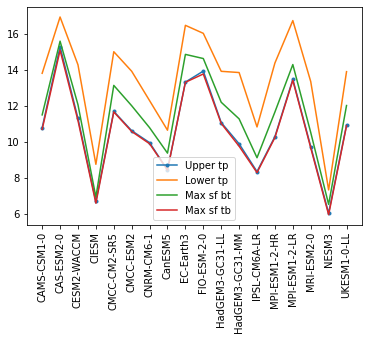

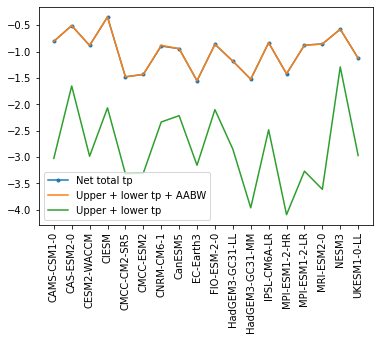

In [35]:
#Model average
up      = np.zeros(len(totmod))
down    = np.zeros(len(totmod))
maxsfbt = np.zeros(len(totmod))
maxsftb = np.zeros(len(totmod))
tpsum   = np.zeros(len(totmod))
for i in range (len(totmod)):
    outfile = ('/home/users/jordi/section26data/' + totmod[i] + '_' + EXP + '_' + ENS[i] + '.nc')
    ncid    = Dataset(outfile,'r')
    tp85    = ncid.variables['tp85'][:,:,:]
    lev     = ncid.variables['lev'][:]
    ncid.close()
    
    tpmean   = np.nanmean(tp85,axis=0)
    tprow    = np.nansum(tpmean,axis=-1)
    mocbt    = -1*np.cumsum(tprow[::-1])[::-1]
    moctb    = np.cumsum(tprow)
    ilevmin     = np.nanargmin(np.abs(lev-200))
    ilevmax = np.nanargmin(np.abs(lev-2000))         #Find index where lev = 2000, so outlier where imax = -1 is solved
        
    if totmod[i] == 'NESM3':                     #NESM3 has a peak in overturning at surface up till depths of ~700m
        ilevmin = np.nanargmin(np.abs(lev-800))
            
    maxsfbt1 = max(mocbt[ilevmin:ilevmax])                #Make sure max is not at the surface
    maxsftb1 = max(moctb[ilevmin:ilevmax])
    
    maxsfbt[i] = maxsfbt1
    maxsftb[i] = maxsftb1
    up[i]      = ektmean[i] + trtmean[i] + iwtmean[i] + fstmean[i]
    down[i]    = uNADWtmean[i] + lNADWtmean[i] 

    tpsum[i] = np.nansum(np.nansum(tpmean,axis=0),axis=0)
    
plt.figure(1)
plt.xticks(rotation=90)
plt.plot(totmod,up,marker='.',label='Upper tp')
plt.plot(totmod,np.abs(down),label='Lower tp')
plt.plot(totmod,maxsfbt,label='Max sf bt')
plt.plot(totmod,maxsftb,label='Max sf tb')
plt.legend()

plt.figure(2)
plt.xticks(rotation=90)
plt.plot(totmod,tpsum,marker='.',label='Net total tp')
plt.plot(totmod,(up+down+AABWtmean),label='Upper + lower tp + AABW')
plt.plot(totmod,(up+down),label='Upper + lower tp')
plt.legend()

print(tpsum)

#### Check time units

In [38]:
totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']
EXP    = 'ssp585'

for i in range (len(totmod)):
    outfile = ('/home/users/jordi/section26data/' + totmod[i] + '_' + EXP + '_' + ENS[i] + '.nc')   #First model has 365 day calendar starting 01-01-1850
    ncid    = Dataset(outfile,'r')
    time    = ncid.variables['time'][:]
    units   = ncid.variables['time'].units
    print(str(totmod[i]) + ' - ' + str(time[0]) + str(np.shape(time)))
    print(str(totmod[i]) + ' - ' + str(units))
    ncid.close()

CAMS-CSM1-0 - 15.5(1020,)
CAMS-CSM1-0 - days since 2015-1-1 00:00
CAS-ESM2-0 - 735125.5416666667(1032,)
CAS-ESM2-0 - days since 0001-01-01 00:00:00
CESM2-WACCM - 735124.5416666667(3420,)
CESM2-WACCM - days since 0001-01-01 00:00:00
CIESM - 735125.5(1032,)
CIESM - days since 0001-01-01 00:00:00
CMCC-CM2-SR5 - 60240.5(1032,)
CMCC-CM2-SR5 - days since 1850-01-01
CMCC-ESM2 - 60240.5(1032,)
CMCC-ESM2 - days since 1850-01-01
CNRM-CM6-1 - 60280.5(1032,)
CNRM-CM6-1 - days since 1850-01-01 00:00:00
CanESM5 - 60240.5(3432,)
CanESM5 - days since 1850-01-01 0:0:0.0
EC-Earth3 - 60280.5(1032,)
EC-Earth3 - days since 1850-01-01 00:00:00
FIO-ESM-2-0 - 735125.5875000001(1032,)
FIO-ESM-2-0 - days since 0001-01-01
HadGEM3-GC31-LL - 59415.0(1032,)
HadGEM3-GC31-LL - days since 1850-01-01
HadGEM3-GC31-MM - 59415.0(1032,)
HadGEM3-GC31-MM - days since 1850-01-01
IPSL-CM6A-LR - 15.5(3432,)
IPSL-CM6A-LR - days since 2015-01-01 00:00:00
MPI-ESM1-2-HR - 60280.5(1032,)
MPI-ESM1-2-HR - days since 1850-1-1 00:00:00
